<a href="https://colab.research.google.com/github/absolute-viper/Git-AI/blob/main/Fischer%20Linear%20Discriminant%20Classifier%20(FLD)/%20Bone%20Mineral%20Density%20/BMD_1(Manual).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODE WITH MANUAL IMPLEMENTATION OF FLD(Code From Scratch)**
Classification Type : Fischer Linear Discriminant Analysis (FLD)

DATASET :"Bone Mineral Density(bmd.csv)"


**Importing Basic Libraries:**


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import math

**Loading Dataset:**


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
DatasetBaseFolder = '/content/gdrive/MyDrive/Colab_Notebooks/Datasets/'

In [4]:
df = pd.read_csv(DatasetBaseFolder+"bmd.csv", index_col="id")
df.head(5)

,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
id,,,,,,,,
469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


**Cleaning Data:**

In [5]:
#########################
# Allocating data Columns to variables
#########################
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:,[0,3,4,6,7]].values
y = df['fracture'].values

#########################
# Assigning Numeric Values to String Data
#########################
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'no fracture', 2: 'fracture'}
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
#########################
# Creating Dictionary for Histograms
#########################
feature_dict = {i:label for i,label in zip(
                range(5),
                  ('Age',
                  'Weight in Kg',
                  'Height in cm',
                  'Waiting Time',
                  'Bmd'))}

In [7]:
%matplotlib inline

**Plotting Histograms:**

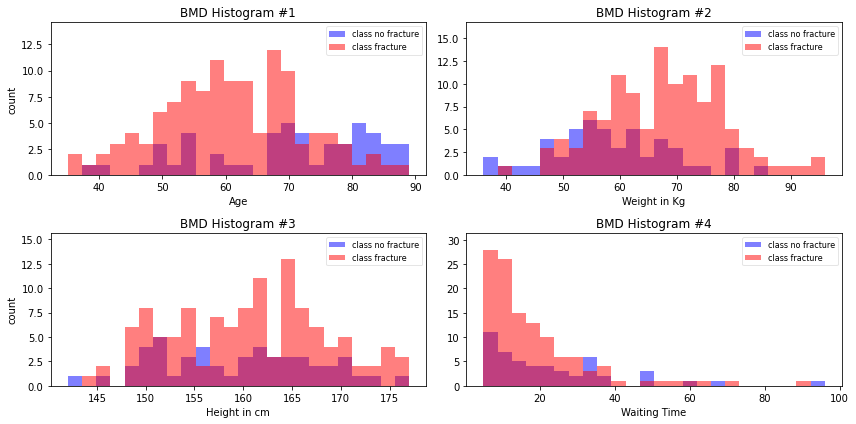

In [10]:
from matplotlib import pyplot as plt
import numpy as np
import math

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

for ax,cnt in zip(axes.ravel(), range(5)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,3), ('blue', 'red')):
        ax.hist(X[y==lab, cnt],color=col, label='class %s' %label_dict[lab],bins=bins, alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('BMD Histogram #%s' %str(cnt+1))

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()

**Forming Vectors:**

In [9]:
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,3):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [ 69.7713  58.41   159.29    23.3      0.6233]

Mean Vector class 2: [ 61.0518  67.2941 160.6597  18.2437   0.8502]



**Forming Matrix from Vectors:**

In [11]:
S_W = np.zeros((5,5))
for cl,mv in zip(range(1,5), mean_vectors):
    class_sc_mat = np.zeros((5,5))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(5,1), mv.reshape(5,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[ 2.2976e+04  4.9711e+02 -3.1226e+03 -3.2018e+02 -3.6319e+01]
 [ 4.9711e+02  1.9583e+04  5.2240e+03  1.5182e+02  1.0847e+02]
 [-3.1226e+03  5.2240e+03  1.0494e+04  4.3902e+02  6.1018e+01]
 [-3.2018e+02  1.5182e+02  4.3902e+02  4.1042e+04 -4.4505e+01]
 [-3.6319e+01  1.0847e+02  6.1018e+01 -4.4505e+01  2.8458e+00]]


**Mean Calculations and Forming Scatter Matrix:**

In [12]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((5,5))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(5,1) # make column vector
    overall_mean = overall_mean.reshape(5,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 2.6768e+03 -2.7273e+03 -4.2047e+02  1.5522e+03 -6.9667e+01]
 [-2.7273e+03  2.7788e+03  4.2841e+02 -1.5815e+03  7.0982e+01]
 [-4.2047e+02  4.2841e+02  6.6048e+01 -2.4382e+02  1.0943e+01]
 [ 1.5522e+03 -1.5815e+03 -2.4382e+02  9.0011e+02 -4.0399e+01]
 [-6.9667e+01  7.0982e+01  1.0943e+01 -4.0399e+01  1.8132e+00]]


**Calculating Eigenvalues:**

In [13]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(5,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[-2.7228e-02]
 [-1.9234e-03]
 [ 6.3324e-03]
 [ 4.2539e-04]
 [-9.9961e-01]]
Eigenvalue 1: 1.11e-16

Eigenvector 2: 
[[ 4.0681e-03]
 [-1.9241e-03]
 [ 6.3347e-03]
 [ 4.2554e-04]
 [-9.9997e-01]]
Eigenvalue 2: 7.69e-01

Eigenvector 3: 
[[ 5.1842e-03]
 [-1.7849e-02]
 [-1.6013e-02]
 [ 2.2868e-04]
 [ 9.9970e-01]]
Eigenvalue 3: -1.13e-17

Eigenvector 4: 
[[-0.0137]
 [ 0.0226]
 [-0.0028]
 [ 0.0178]
 [-0.9995]]
Eigenvalue 4: 4.24e-18

Eigenvector 5: 
[[-0.0088]
 [ 0.0214]
 [ 0.0383]
 [ 0.0183]
 [-0.9988]]
Eigenvalue 5: -1.26e-18


In [14]:
#########################
# Creating Assertion for array
#########################
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(5,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


In [15]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

0.769431790252819
1.1102230246251565e-16
1.1264393944290449e-17
4.239536767630296e-18
1.262195182698763e-18


**Calculating Variance:**

In [16]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%


In [17]:
W = np.hstack((eig_pairs[0][1].reshape(5,1), eig_pairs[1][1].reshape(5,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 4.0681e-03 -2.7228e-02]
 [-1.9241e-03 -1.9234e-03]
 [ 6.3347e-03  6.3324e-03]
 [ 4.2554e-04  4.2539e-04]
 [-9.9997e-01 -9.9961e-01]]


In [18]:
X_lda = X.dot(W)
assert X_lda.shape == (169,2), "The matrix is not 150x2 dimensional."

**Plotting Data:**

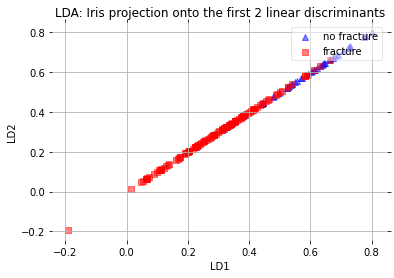

In [19]:
#########################
# Scatter Ploting the Data
#########################
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,3),('^', 's'),('blue', 'red')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,0].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()